# Hello, KAN!

### Kolmogorov-Arnold representation theorem

Kolmogorov-Arnold representation theorem states that if $f$ is a multivariate continuous function
on a bounded domain, then it can be written as a finite composition of continuous functions of a
single variable and the binary operation of addition. More specifically, for a smooth $f : [0,1]^n \to \mathbb{R}$,


$$f(x) = f(x_1,...,x_n)=\sum_{q=1}^{2n+1}\Phi_q(\sum_{p=1}^n \phi_{q,p}(x_p))$$

where $\phi_{q,p}:[0,1]\to\mathbb{R}$ and $\Phi_q:\mathbb{R}\to\mathbb{R}$. In a sense, they showed that the only true multivariate function is addition, since every other function can be written using univariate functions and sum. However, this 2-Layer width-$(2n+1)$ Kolmogorov-Arnold representation may not be smooth due to its limited expressive power. We augment its expressive power by generalizing it to arbitrary depths and widths.

### Kolmogorov-Arnold Network (KAN)

The Kolmogorov-Arnold representation can be written in matrix form

$$f(x)={\bf \Phi}_{\rm out}\circ{\bf \Phi}_{\rm in}\circ {\bf x}$$

where 

$${\bf \Phi}_{\rm in}= \begin{pmatrix} \phi_{1,1}(\cdot) & \cdots & \phi_{1,n}(\cdot) \\ \vdots & & \vdots \\ \phi_{2n+1,1}(\cdot) & \cdots & \phi_{2n+1,n}(\cdot) \end{pmatrix},\quad {\bf \Phi}_{\rm out}=\begin{pmatrix} \Phi_1(\cdot) & \cdots & \Phi_{2n+1}(\cdot)\end{pmatrix}$$

We notice that both ${\bf \Phi}_{\rm in}$ and ${\bf \Phi}_{\rm out}$ are special cases of the following function matrix ${\bf \Phi}$ (with $n_{\rm in}$ inputs, and $n_{\rm out}$ outputs), we call a Kolmogorov-Arnold layer:

$${\bf \Phi}= \begin{pmatrix} \phi_{1,1}(\cdot) & \cdots & \phi_{1,n_{\rm in}}(\cdot) \\ \vdots & & \vdots \\ \phi_{n_{\rm out},1}(\cdot) & \cdots & \phi_{n_{\rm out},n_{\rm in}}(\cdot) \end{pmatrix}$$

${\bf \Phi}_{\rm in}$ corresponds to $n_{\rm in}=n, n_{\rm out}=2n+1$, and ${\bf \Phi}_{\rm out}$ corresponds to $n_{\rm in}=2n+1, n_{\rm out}=1$.

After defining the layer, we can construct a Kolmogorov-Arnold network simply by stacking layers! Let's say we have $L$ layers, with the $l^{\rm th}$ layer ${\bf \Phi}_l$ have shape $(n_{l+1}, n_{l})$. Then the whole network is

$${\rm KAN}({\bf x})={\bf \Phi}_{L-1}\circ\cdots \circ{\bf \Phi}_1\circ{\bf \Phi}_0\circ {\bf x}$$

In constrast, a Multi-Layer Perceptron is interleaved by linear layers ${\bf W}_l$ and nonlinearities $\sigma$:

$${\rm MLP}({\bf x})={\bf W}_{L-1}\circ\sigma\circ\cdots\circ {\bf W}_1\circ\sigma\circ {\bf W}_0\circ {\bf x}$$

A KAN can be easily visualized. (1) A KAN is simply stack of KAN layers. (2) Each KAN layer can be visualized as a fully-connected layer, with a 1D function placed on each edge. Let's see an example below.

### Get started with KANs

Initialize KAN

In [2]:
from kan import *
torch.set_default_dtype(torch.float64)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[2,5,1], grid=3, k=3, seed=42, device=device)

cuda
checkpoint directory created: ./model
saving model version 0.0


Create dataset

In [3]:
from kan.utils import create_dataset
# create dataset f(x,y) = exp(sin(pi*x)+y^2)
f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)
dataset = create_dataset(f, n_var=2, device=device)
dataset['train_input'].shape, dataset['train_label'].shape

(torch.Size([1000, 2]), torch.Size([1000, 1]))

Plot KAN at initialization

In [7]:
model(dataset['train_input'])

tensor([[3.1093],
        [6.5890],
        [0.7961],
        [3.4571],
        [3.8567],
        [2.8534],
        [0.5007],
        [0.4425],
        [1.7031],
        [0.7737],
        [1.2982],
        [0.8147],
        [0.4495],
        [2.3561],
        [1.0115],
        [1.1780],
        [1.0060],
        [0.4273],
        [2.3942],
        [2.6298],
        [0.6648],
        [6.5136],
        [0.6438],
        [1.3948],
        [0.3940],
        [1.9967],
        [2.6910],
        [3.1876],
        [6.5460],
        [0.3848],
        [2.5335],
        [2.3815],
        [0.4917],
        [0.7963],
        [0.9463],
        [3.1582],
        [1.6032],
        [1.1966],
        [3.0291],
        [0.4974],
        [0.5106],
        [1.0504],
        [2.8294],
        [0.4868],
        [2.7073],
        [1.8612],
        [2.1612],
        [1.7401],
        [1.9280],
        [2.2864],
        [2.9766],
        [0.7930],
        [0.4835],
        [1.7073],
        [6.5696],
        [0

In [5]:
dataset["train_label"]

tensor([[3.1481],
        [6.5976],
        [0.7953],
        [3.4230],
        [3.8323],
        [2.8803],
        [0.4949],
        [0.4471],
        [1.6879],
        [0.7747],
        [1.3055],
        [0.8055],
        [0.4544],
        [2.3354],
        [1.0084],
        [1.1847],
        [1.0150],
        [0.4204],
        [2.3784],
        [2.6542],
        [0.6557],
        [6.4748],
        [0.6450],
        [1.3893],
        [0.3861],
        [1.9856],
        [2.6840],
        [3.1836],
        [6.5865],
        [0.3764],
        [2.5469],
        [2.3607],
        [0.4852],
        [0.7901],
        [0.9427],
        [3.1234],
        [1.5907],
        [1.1967],
        [3.0557],
        [0.5038],
        [0.5091],
        [1.0571],
        [2.8579],
        [0.4924],
        [2.7244],
        [1.8824],
        [2.1394],
        [1.7695],
        [1.9916],
        [2.2560],
        [3.0090],
        [0.7881],
        [0.4774],
        [1.7370],
        [6.6189],
        [0

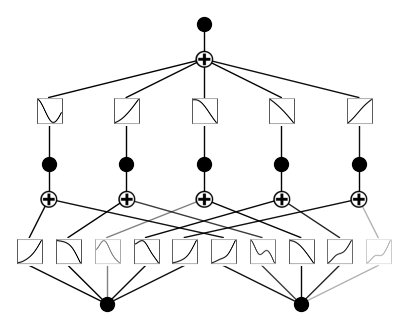

In [4]:
# plot KAN at initialization
model(dataset['train_input'])
model.plot()

Train KAN with sparsity regularization

In [6]:
# train the model
model.fit(dataset, opt="LBFGS", steps=50, lamb=0.001);

| train_loss: 1.85e-02 | test_loss: 1.77e-02 | reg: 6.93e+00 | : 100%|█| 50/50 [00:15<00:00,  3.19it

saving model version 0.1


Plot trained KAN

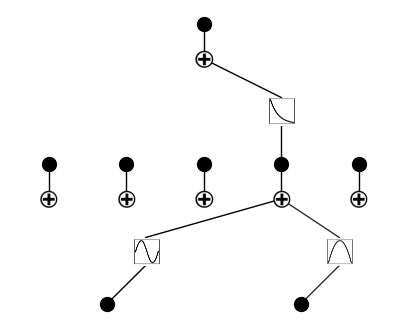

In [6]:
model.plot()

Prune KAN and replot

saving model version 0.2


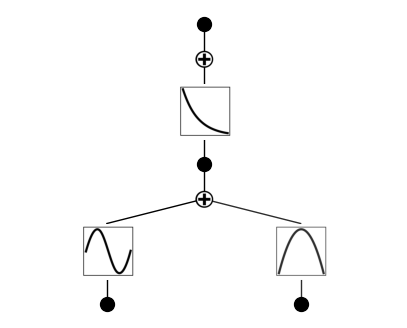

In [7]:
model = model.prune()
model.plot()

Continue training and replot

In [7]:
model.fit(dataset, opt="LBFGS", steps=50);

| train_loss: 1.79e-02 | test_loss: 1.72e-02 | reg: 7.66e+00 | : 100%|█| 50/50 [00:06<00:00,  7.21it

saving model version 0.3


In [8]:
model = model.refine(10)

saving model version 0.4


In [9]:
model.fit(dataset, opt="LBFGS", steps=50);

| train_loss: 4.67e-04 | test_loss: 4.73e-04 | reg: 7.66e+00 | : 100%|█| 50/50 [00:06<00:00,  7.37it

saving model version 0.5


Automatically or manually set activation functions to be symbolic

In [10]:
mode = "auto" # "manual"

if mode == "manual":
    # manual mode
    model.fix_symbolic(0,0,0,'sin');
    model.fix_symbolic(0,1,0,'x^2');
    model.fix_symbolic(1,0,0,'exp');
elif mode == "auto":
    # automatic mode
    lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
    model.auto_symbolic(lib=lib)

fixing (0,0,0) with sin, r2=0.9999999188529035, c=2
fixing (0,1,0) with x^2, r2=0.9999999809840728, c=2
fixing (1,0,0) with exp, r2=0.9999999904907739, c=2
saving model version 0.6


Continue training till machine precision

In [11]:
model.fit(dataset, opt="LBFGS", steps=50);

| train_loss: 3.33e-10 | test_loss: 7.20e-11 | reg: 0.00e+00 | : 100%|█| 50/50 [00:02<00:00, 24.56it


saving model version 0.7


Obtain the symbolic formula

In [12]:
from kan.utils import ex_round

ex_round(model.symbolic_formula()[0][0],4)

1.0*exp(1.0*x_2**2 + 1.0*sin(3.1416*x_1))